In [1]:
import suncal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 10

# Magnitude and Phase from Real and Imaginary
## GUM Supplement 2, Section 9.3

This example recreates plots in GUM Supplement 2 demonstrating magnitude and phase from real and imaginary components.
The GUM steps through comparison of GUM and Monte-Carlo frameworks for several real/imaginary values with and without correlations.

In [2]:
def plotit(u):
    ''' Helper function to get consistent plots for all cells. '''
    fig = plt.figure(figsize=(6,3.5))
    u.out.plot_correlation(fig=fig, contour=True, bins=35, cmapmc='viridis')
    fig2 = plt.figure(figsize=(6,3.5))
    u.out.plot_pdf(plot=fig2, legend=False)

|Function   | Method       | Nominal   | Std. Uncertainty   | 95% Coverage   | k         | Deg. Freedom  |
|----------|------------|---------|------------------|--------------|---------|--------------|
|$mag$   | GUM          | 0.0010   | 0.010            | ± 0.020      | 1.960     | inf           |
|$mag$   | Monte Carlo  | 0.0126   | 0.0066            | (0.0022 , 0.0272 ) | 1.902     | -             |
|$ph$   | GUM          | 0.0 rad  | 10 rad           | ± 20 rad     | 1.960     | inf           |
|$ph$   | Monte Carlo  | -0.0022 rad | 1.7 rad          | (-3.0 rad, 3.0 rad) | 1.699     | -             |

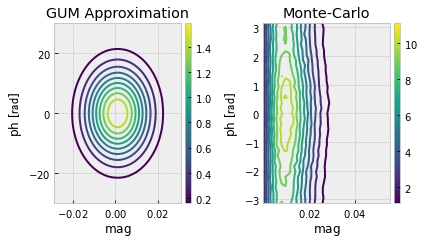

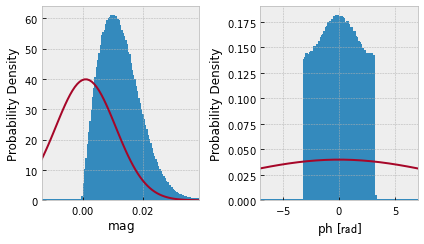

In [3]:
# Start with no correlation - GUM.S2 Figure 16
re = .001
im = 0

# NOTE: GUM used 1E7 samples. Running 1E6 here to save time.
u = suncal.UncertCalc(['mag = sqrt(re**2 + im**2)', 'ph = atan2(im, re)'], samples=1000000)
u.set_input('re', nom=re, std=.01)
u.set_input('im', nom=im, std=.01)
display(u.calculate())
plotit(u)

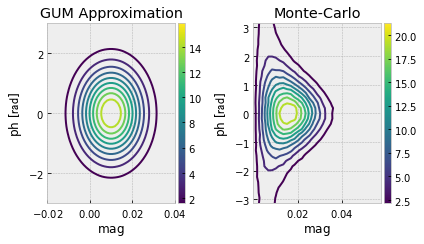

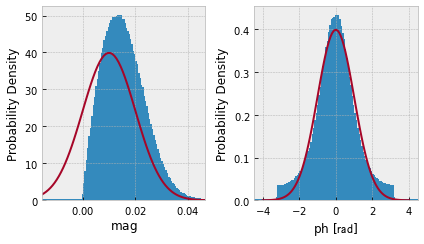

In [4]:
# re = .01 (Figure 17)
# Note: no need to redefine whole calculator, just change the input nominal value and calculate().
u.set_input('re', nom=.01)
u.calculate();
plotit(u)

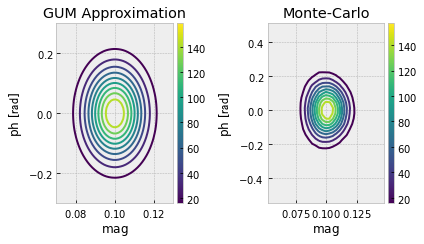

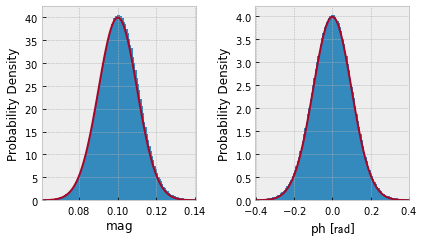

In [5]:
# re = .1 (Figure 18)
u.set_input('re', nom=.1)
u.calculate();
plotit(u)

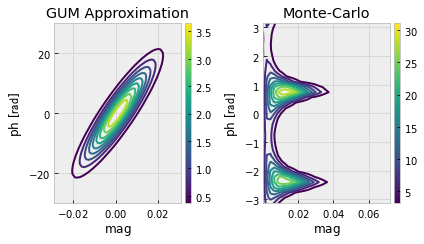

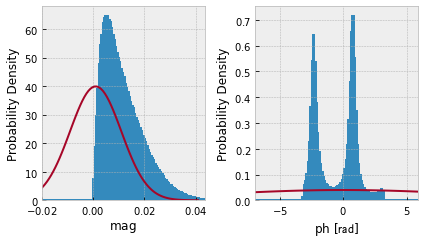

In [6]:
# Now correlate the real/imaginary components.
# re = .001
# correlation = 0.9  (Figure 19)

u.set_input('re', nom=.001)
u.correlate_vars('re', 'im', .9)
u.calculate();
plotit(u)

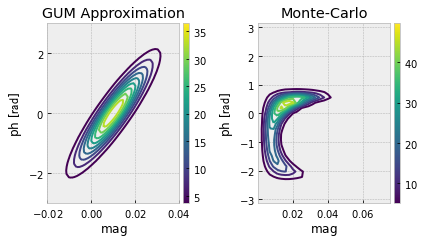

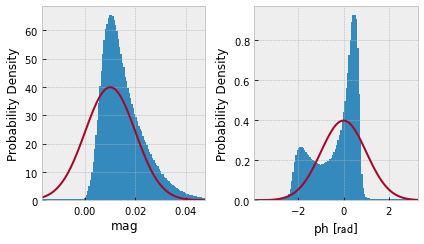

In [7]:
# re = .01
# correlation = 0.9  (Figure 20)

u.set_input('re', nom=.01)
u.correlate_vars('re', 'im', .9)
u.calculate();
plotit(u)

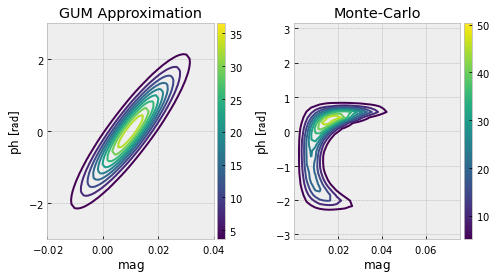

In [8]:
fig = plt.figure(figsize=(7,4))
u.out.plot_correlation(plot=fig, contour=True)

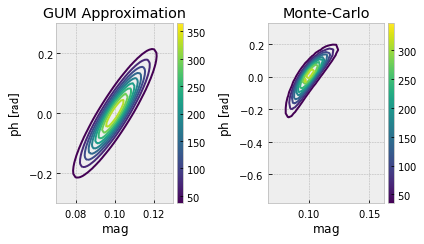

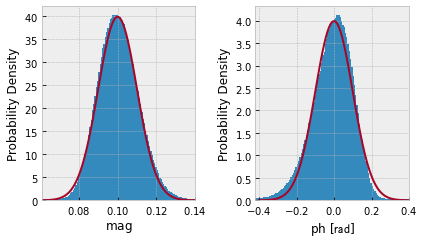

In [9]:
# re = .1
# correlation = 0.9  (Figure 21)

u.set_input('re', nom=.1)
u.correlate_vars('re', 'im', .9)
u.calculate();
plotit(u)